# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_merge


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [71]:
# Checking the number of mice.
unique_mouseID = len(mouse_merge["Mouse ID"].unique())
unique_mouseID

249

In [72]:
all_mouseID = len(mouse_merge["Mouse ID"])
all_mouseID

1893

In [73]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_merge[mouse_merge.duplicated(["Mouse ID", "Timepoint"], keep='first')]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_mice = mouse_merge.drop_duplicates(["Mouse ID","Timepoint"], keep='last')
updated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
# Checking the number of mice in the clean DataFrame.
new_mouseID = len(updated_mice["Mouse ID"].unique())
new_mouseID

249

In [76]:
# reset index on updated DF
final_mice = updated_mice.reset_index()
final_mice

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1883,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1884,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1885,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1886,1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tv_mean = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tv_mean = pd.DataFrame(tv_mean)
tv_mean.columns=["Mean Tumor Volume"]
tv_median = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tv_median = pd.DataFrame(tv_median)
tv_median.columns=["Median Tumor Volume"]
tv_variance = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tv_variance = pd.DataFrame(tv_variance)
tv_variance.columns=["Tumor Volume Variance"]
tv_stddv = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tv_stddv = pd.DataFrame(tv_stddv)
tv_stddv.columns=["Tumor Volume Std Dev"]
tv_sem = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tv_sem = pd.DataFrame(tv_sem)
tv_sem.columns=["Tumor Volume Std. Err."]

tv_stats = pd.concat([tv_mean, tv_median, tv_variance, tv_stddv, tv_sem], axis=1)
tv_stats = pd.DataFrame(tv_stats)
tv_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tvstatsbydrug = final_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tvstatsbydrug = pd.DataFrame(tvstatsbydrug)
# tvstatsbydrug.style.set_caption("Tumor Volume (mm3)")
# tvstatsbydrug = tvstatsbydrug.style.set_caption('Tumor Volume (mm3)')
tvstatsbydrug.columns = pd.MultiIndex.from_tuples(
    zip(["Tumor Volume mm3",'','','',''],tvstatsbydrug.columns))
tvstatsbydrug

Tumor Volume mm3                                          
                         mean     median        var       std       sem
Drug Regimen                                                           
Capomulin           40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin            52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol           52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril            55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol            54.331565  52.509285  66.173479  8.134708  0.596466
Placebo             54.033581  52.288934  61.168083  7.821003  0.581331
Propriva            52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane            40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn            54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol           53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [91]:
mice_tested_per_drug = final_mice.groupby(["Drug Regimen"])["Mouse ID"].count()
mice_tested_per_drug = pd.DataFrame(mice_tested_per_drug)
mice_tested_per_drug.columns=["Number of Mice Tested"]
mice_tested_per_drug

,Number of Mice Tested
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


<AxesSubplot:title={'center':'Number of Mice Tested per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

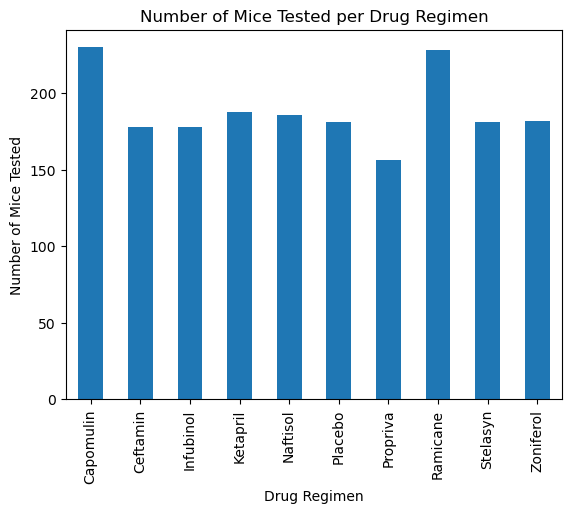

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested_per_drug.plot.bar(ylabel='Number of Mice Tested', title='Number of Mice Tested per Drug Regimen', legend=False)


Text(0, 0.5, 'Number of Mice Tested')

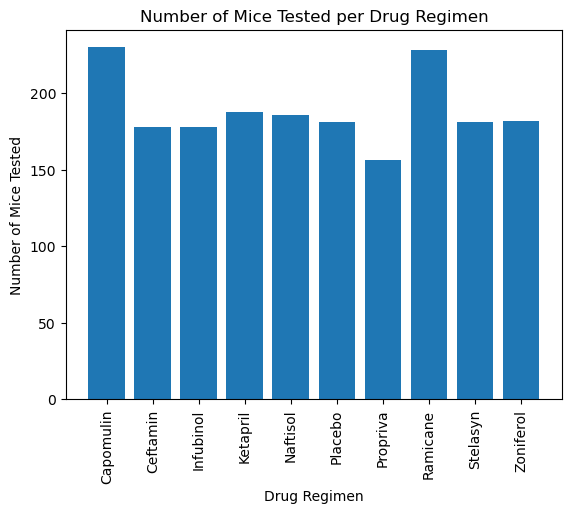

In [120]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugregimen = list(final_mice.groupby(["Drug Regimen"]))
total_mice_per_drug = list(final_mice.groupby(["Drug Regimen"])["Mouse ID"].count())
drugregimen = np.arange(len(drugregimen))
plt.bar(drugregimen, total_mice_per_drug, align="center")
plt.xticks(np.arange(len(drugregimen)), (mice_tested_per_drug.index), rotation=90)
plt.title("Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


<AxesSubplot:title={'center':'Percentage of Mice by Sex'}>

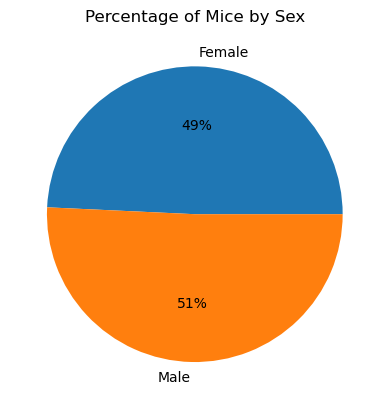

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
final_mice.groupby(["Sex"])["Mouse ID"].count().plot(kind='pie', ylabel='', autopct='%1.0f%%', title="Percentage of Mice by Sex")


In [157]:
mouse_by_sex = final_mice.groupby(["Sex"])["Mouse ID"].count()
mouse_by_sex = pd.DataFrame(mouse_by_sex)
mouse_by_sex.columns=["Number of Mice Tested"]
mouse_by_sex

,Number of Mice Tested
Sex,
Female,930
Male,958


Text(0.5, 1.0, 'Percentage of Mice by Sex')

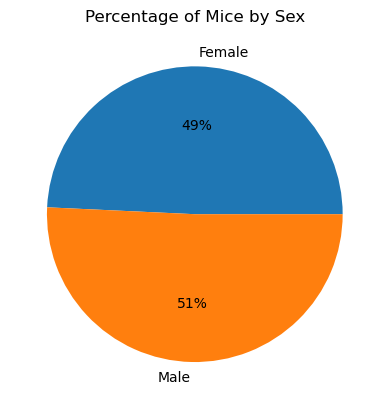

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_by_sex["Number of Mice Tested"], labels=mouse_by_sex.index, autopct='%1.0f%%')
plt.title("Percentage of Mice by Sex")



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


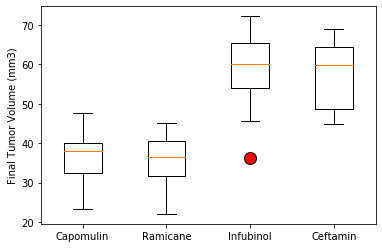

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

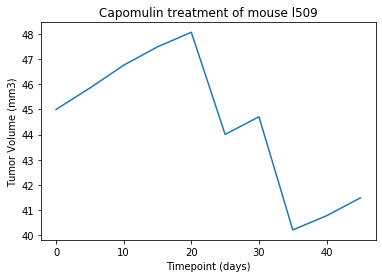

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



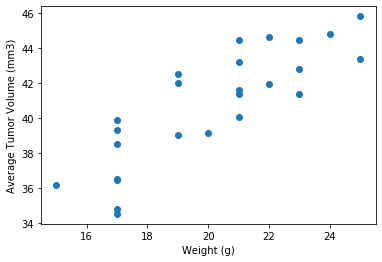

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


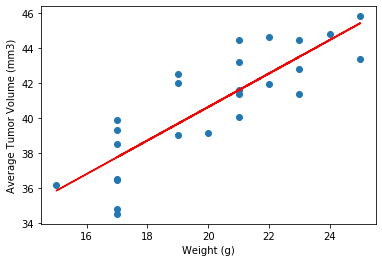

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

